<font color="dodgerblue">**Spatial Plots of Max Percent Differences**</font>

<ins>Main_Purpose</ins> :This script works to create spatial difference plots at the date and time where said max percent difference occurs (in both the positive and negative direction) between two CMAQ output files

<ins>Other_Features</ins>:
* Works with <font color="teal">**Lambert Conformal**</font> (CONUS and states/localities within) and <font color="purple">**Stereographically**</font> (N. Hemispheric) Projected output
    * (<font color = "darkorange">If you need another spatial domain not covered Sara Farrell can add one in!</font>)
* Showcases colorgrid options
* Extracts time, projection, species and units from file headers
* <font color="deeppink">Circles</font> the grid cell and area where the max difference occurs

<ins>General Instructions</ins>:
1) You run each cell by clicking in it and then pressing Enter+Shift
2) You will be prompted to provide path destinations, file names, color schemes, etc
3) This is in it's beta form so if you have any feedback or need any help feel free to Teams chat or e-mail Sara Farrell (Farrell.Sara@epa.gov) for help

**_Importing Libraries_**

In [1]:
from netCDF4 import Dataset
import numpy as np
import pyproj
import matplotlib.pyplot as plt
from textwrap import wrap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
import matplotlib.patches as mpatches
import os
import pandas
import math

# **_Pick from an assortment of color_schemes_**

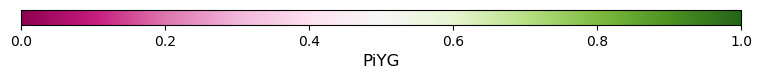

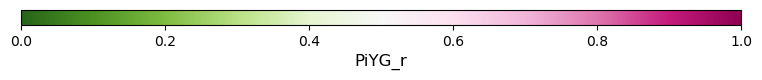

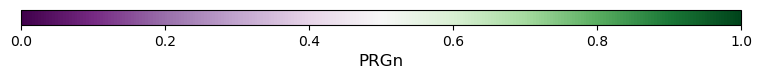

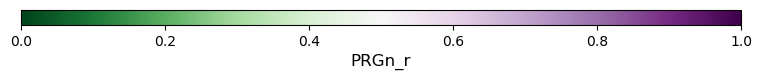

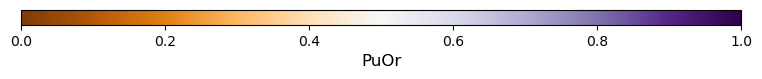

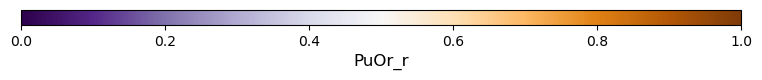

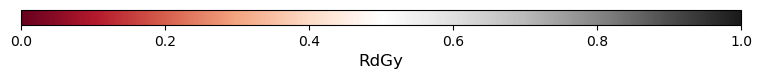

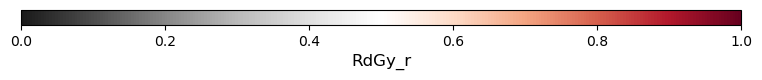

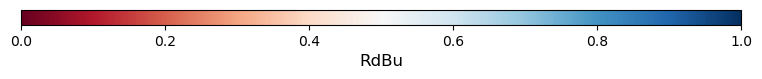

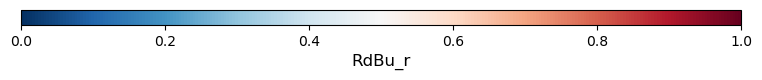

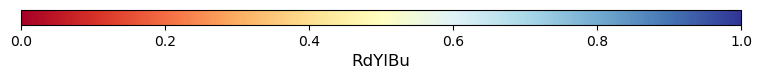

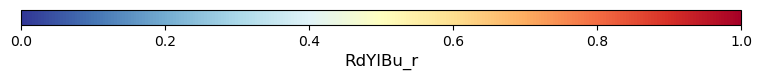

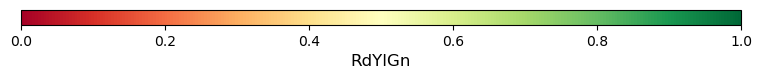

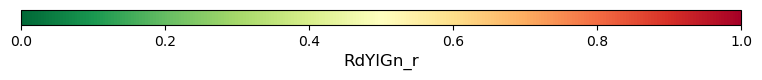

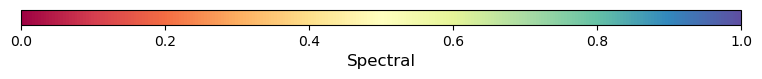

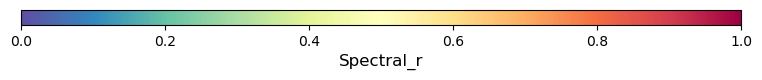

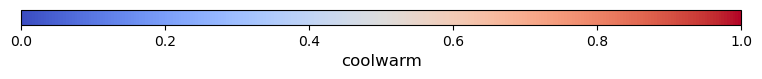

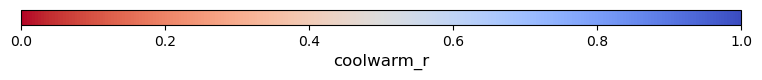

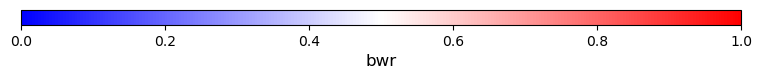

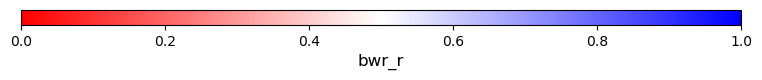

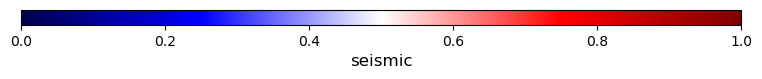

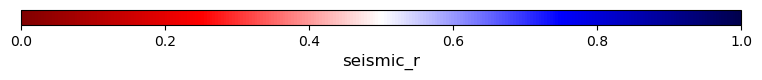

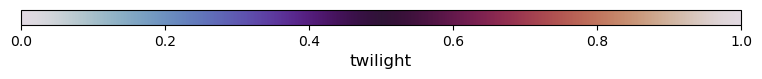

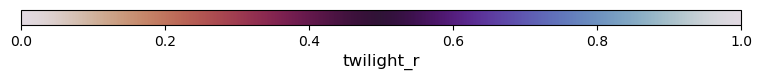

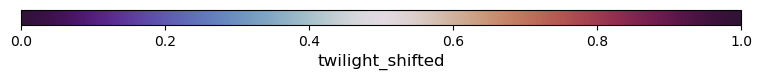

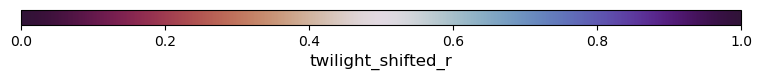

In [2]:
list_color_bars = plt.colormaps()
list_color_bars_strings = ['PiYG','PiYG_r','PRGn','PRGn_r','PuOr','PuOr_r','RdGy','RdGy_r','RdBu','RdBu_r','RdYlBu','RdYlBu_r','RdYlGn', 'RdYlGn_r',\
                           'Spectral','Spectral_r','coolwarm','coolwarm_r','bwr','bwr_r','seismic','seismic_r','twilight','twilight_r','twilight_shifted','twilight_shifted_r']

for l in range(len(list_color_bars_strings)):
    cmap = plt.get_cmap(list_color_bars_strings[l])
    a = np.array([[0,1]])
    plt.figure(figsize=(9, 1.5))
    img = plt.imshow(a, cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.1])
    bar = plt.colorbar(orientation="horizontal", cax=cax)
    bar.set_label(list_color_bars_strings[l],fontsize=12)
    plt.show()
    

**Things you will need to customize**
* path1 and path2 need to point to where your output files for your base (path1) and experimental (path2) are
* the headings that describe your base and experimental runs
* file1 and file2 are the names of your base and experimental files
* your cmap with your colorbar that you picked from above and set it to your color_scheme
* where you want your plots to be outputted
* the percent threshold below which you don't care about differences
* the time difference between your domain and GMT

**_Set up your Inputs (just Shift+Enter for each cell, answer the prompt in the box, and Enter again)_**

Specify path and filename for the base case:

In [14]:
path1=("/fsx/data/output/output_v54+_cb6r5_ae7_aq_WR413_MYR_gcc_2018_12US1_3x64_classic/")

In [15]:
file1=("CCTM_AELMO_v54+_cb6r5_ae7_aq_WR413_MYR_gcc_2018_12US1_3x64_classic_20171222.nc")

Specify the path for the sensitivity case

Specify your sensitivity file name

In [16]:
path2=("/fsx/data/output/output_v54+_cb6r5_ae7_aq_WR413_MYR_gcc_12US1_DESID_REDUCE/")


In [17]:
file2=("CCTM_AELMO_v54+_cb6r5_ae7_aq_WR413_MYR_gcc_2018_12US1_DESID_REDUCE_20171222.nc")


enter the title heading for your first/base file (i.e. Base CMAQ)

In [6]:
heading1='Base CMAQ'

enter the title heading for your updated/sensitivity file (ie. DESID PT_EGU NY reduction)

In [7]:
heading2='DESID PT_EGU NY reduction'

In [8]:
color_scheme = input('enter the name of the colorbar you want to use:')

enter the name of the colorbar you want to use: seismic


Create an output directory to save the images

In [9]:
!mkdir -p /fsx/data/output/desid_emis_red_images_new

enter your output directory

In [10]:
outputdir='/fsx/data/output/desid_emis_red_images_new'

In [11]:
percent_change_threshold = input('enter the threshold value below which you do not care about the percent change (i.e. 10 for 10% but you can also put 0 if you are interested in all of the percent changes)):')

enter the threshold value below which you do not care about the percent change (i.e. 10 for 10% but you can also put 0 if you are interested in all of the percent changes)): 10


In [12]:
time_change = input('enter the time change between local and UTC (i.e. for Fairbanks, -8 in summer, for Germany, 2)')

enter the time change between local and UTC (i.e. for Fairbanks, -8 in summer, for Germany, 2) -4


**_Run the cell below to check that your /directories/folders exist_**

(If you get any errors, <font color = "darkorange">fix and re-run</font> whichever prompt box applies and then check again)

In [19]:
## Checking if input files, color_schemes, and output directories exist ##
#print(path1)
#print(file1)
#print(path2)
#print(file2)

if os.path.isdir(path1):
    pass
else:
    print('Error path1 does not exist')

if os.path.isdir(path2):
    pass
else:
    print('Error path2 does not exist')


if os.path.isfile(path1+'/'+file1):
    pass
else:
    print('Error: either path1 or file1 do not exist')
    
if os.path.isfile(path2+'/'+file2):
    pass
else:
    print('Error: either path2 or file2 do not exist')
    
if color_scheme not in list_color_bars_strings:
    print('Error: choose another color scheme')
    
if os.path.exists(outputdir):
    pass
else:
    print('Error: output directory does not exist')

Error: either path2 or file2 do not exist


<font color="deeppink">**R**</font><font color="darkorange">**U**</font><font color="goldenrod">**N**</font> <font color="green">**T**</font><font color="dodgerblue">**H**</font><font color="purple">**E**</font> <font color="deeppink">**S**</font><font color="darkorange">**C**</font><font color="goldenrod">**R**</font><font color="green">**I**</font><font color="dodgerblue">**P**</font><font color="purple">**T**</font>

(will likely take a bit depending on how many variables you are looping through but check at the bottom of the next cell for error messages that stop the script)

In [23]:
## Defines the inputs specified to loop through ##
path_combo1 = [path1, path2]

paths = [path_combo1]

comboheading1 = ' difference between '+heading1+' vs '+heading2
for p in range(len(paths)):
    
    path_combo = paths[p]
    
    ## Extracts NetCDF Files##
    File1 = Dataset(path_combo[0]+'/'+file1, mode='r')
    File2 = Dataset(path_combo[1]+'/'+file2, mode='r')

    ## Extracts Model Start Date ##
    date_string = str(File1.SDATE)
    date_year = date_string[0:4]
    day_of_year = date_string[4:]
 
    ## Converting to date ##
    day_of_year.rjust(3 + len(day_of_year), '0')
    res = datetime.strptime(date_year + "-" + day_of_year, "%Y-%j").strftime("%m-%d-%Y")
    datetime_res = datetime.strptime(res, "%m-%d-%Y")
    
    ## Sets Projection Information from output Header: GDTYP variable ##
    if File1.GDTYP == 2:
        pproj=ccrs.LambertConformal(
        central_longitude=File1.XCENT,
        central_latitude=File1.YCENT,
        false_easting=0.0,
        false_northing=0.0,
        globe=None,
        cutoff=-30)
    if File1.GDTYP == 6:
        pproj = ccrs.Stereographic(
        central_latitude=90,
        central_longitude=File1.P_GAM,
        false_easting=File1.XCENT,
        false_northing=File1.YCENT,
        true_scale_latitude=File1.P_BET,
        globe=None)
    
    ## Setups up Meshgrid ##
    x=np.arange(
    start=File1.XORIG,
    stop=File1.XORIG+(File1.NCOLS+1)*File1.XCELL,
    step=File1.XCELL)

    y=np.arange(
    start=File1.YORIG,
    stop=File1.YORIG+(File1.NROWS+1)*File1.YCELL,
    step=File1.YCELL)

    xx,yy=np.meshgrid(x,y)
    
    ## Extracts all output variable names from both of your files ##
    list_vars_f1 = list(File1.variables.keys())[1:]
    list_vars_f2 = list(File2.variables.keys())[1:]

    ## Narrows the list of variables to loop through to those that exist in each file ##
    inner_merge_variables = set(list_vars_f1) & set(list_vars_f2)
    list_inner_merge_variables = list(inner_merge_variables)
    
    ## Creates empty list that will be added to with gas and pm species ##
    max_value_ppmV = []
    max_value_ugm3 = []
    
    max_species_ppmV = []
    max_species_ugm3 = []
    
    ## Loops through each variable
    for i in range(len(list_inner_merge_variables)):
        
        ## Extracts variables from files ##
        var1 = np.array(File1.variables[list_inner_merge_variables[i]][:])
        var2 = np.array(File2.variables[list_inner_merge_variables[i]][:])
        
        ## Reshapes the variable arrays to 2D [time,spatial] ##
        var1_flat = var1.reshape(len(var1),File1.NCOLS*File1.NROWS)
        var2_flat = var2.reshape(len(var2),File2.NCOLS*File2.NROWS)
        pct_diff = []
        conc_diff = []
        
        ## Calculates the percent differences and concentration differences for each time point at each gridcell ##
        ## and appends the difference arrays to the empty arrays defined above "pct_diff" and "conc_diff"
        for j in range(len(var1_flat)):
            pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
            pct_diff.append(pd)
            diff = var2_flat[j]-var1_flat[j]
            conc_diff.append(diff)
            
            
        ## Sets up difference arrays (percent and conc) and finds the locations of both the max positive ##
        ## and max negative differences ##
        pct_diff_array = np.array(pct_diff).reshape(len(var1),File1.NROWS,File1.NCOLS)
        conc_diff_array = np.array(conc_diff).reshape(len(var1),File1.NROWS,File1.NCOLS)
        neg_conc_diff = conc_diff_array[np.where(conc_diff_array < 0)]
        pos_conc_diff = conc_diff_array[np.where(conc_diff_array >= 0)]
        neg_pct_diff = pct_diff_array[np.where(pct_diff_array < 0)]
        pos_pct_diff = pct_diff_array[np.where(pct_diff_array >= 0)]
        abs_pct_diff_array = np.abs(pct_diff_array)
        max_diff_time_loc = np.where(abs_pct_diff_array==np.max(abs_pct_diff_array))
        abs_conc_diff_array = np.abs(conc_diff_array)
        max_conc_time_loc = np.where(abs_conc_diff_array==np.max(abs_conc_diff_array))
        
        ## Extracts the units for each variable ##
        units_with_spaces = File1.variables[list_inner_merge_variables[i]].units
        units = units_with_spaces.replace(' ','')
        
        ## Works to create table with highest percent changes for gas and pm species ##
        ## Variable types are spotted by unit and so additional types can be added this way ##

        if units=='ppmV':
            max_value_ppmV.append(np.max(abs_pct_diff_array))
            max_species_ppmV.append(list_inner_merge_variables[i])
        if units=='ugm-3':
            max_value_ugm3.append(np.max(abs_pct_diff_array))
            max_species_ugm3.append(list_inner_merge_variables[i])
        
        ## If the max absolute value of the percent difference is less than the threshold ##
        ## you set then the plot for this species will be skipped over ##
        if np.nanmax(abs_pct_diff_array) <= float(percent_change_threshold) or math.isnan(np.nanmax(abs_pct_diff_array)):
            print('There are no differences in '+list_inner_merge_variables[i])
            pass

        ## Otherwise if the species has both positive and negative percent differences and ##
        ## either one of these differences is above the set percent difference threshold ##
        ## then the time where each takes place is found ##
        elif len(neg_conc_diff)>0 and len(pos_conc_diff)>0:
            max_diff_pos_time_loc = np.where(conc_diff_array==np.max(pos_conc_diff))
            max_diff_neg_time_loc = np.where(conc_diff_array==np.min(neg_conc_diff))

            ## If there are multiple time points where the same max value occurs ##
            ## this finds the time where percent differents are the highest across ##
            ## the whole spatial domain for each time point where the max value occurs ##
            time_max_pos = max_diff_pos_time_loc[0]
            if len(time_max_pos) > 1:
                time_max_pos_unique = np.unique(time_max_pos)
                ave_pos_max = []
                for t in range(len(time_max_pos_unique)):
                    ave_pos_max.append(np.mean(conc_diff_array[time_max_pos_unique[t]]))
                time_max_pos_t = np.where(ave_pos_max==np.max(ave_pos_max))
                time_max_pos_i = time_max_pos_unique[time_max_pos_t]
            else:
                time_max_pos_i = max_diff_pos_time_loc[0]
            time_max_neg = max_diff_neg_time_loc[0]
            if len(time_max_neg) > 1:
                time_max_neg_unique = np.unique(time_max_neg)
                ave_neg_max = []
                for n in range(len(time_max_neg_unique)):
                    ave_neg_max.append(np.mean(conc_diff_array[time_max_neg_unique[n]]))
                time_max_neg_t = np.where(ave_neg_max==np.min(ave_neg_max))
                time_max_neg_i = time_max_neg_unique[time_max_neg_t]
            else:
                time_max_neg_i = max_diff_neg_time_loc[0]
            
            ## This extracts the concentration differences at the time where the max difference occurs ##
            ## This is what is plotted ##
            max_pos_diff_array = conc_diff_array[time_max_pos_i].reshape(File1.NROWS,File1.NCOLS)
            max_neg_diff_array = conc_diff_array[time_max_neg_i].reshape(File1.NROWS,File1.NCOLS)
            
            ## This grabs the spatial location where the max percent difference occurs ##
            ## This is where the pink circle goes ##
            max_diff_pos_loc = [max_diff_pos_time_loc[1][0],max_diff_pos_time_loc[2][0]]
            max_diff_neg_loc = [max_diff_neg_time_loc[1][0],max_diff_neg_time_loc[2][0]]
            
            ## Two plots are made and looped through here for the max positive and max ##
            ## negative percent differences ##
            circle_locs = [max_diff_pos_loc,max_diff_neg_loc]
            plot_arrays = [max_pos_diff_array, max_neg_diff_array]
            time_max = [time_max_pos_i,time_max_neg_i]
            dirchange=['increase','decrease']
            plot_subheading = [' (Max Pos)',' (Max Neg)']
            max_percent_changes = [str(pct_diff_array[max_diff_pos_time_loc][0]),str(pct_diff_array[max_diff_neg_time_loc][0])]
            for a in range(len(plot_arrays)):
                plot_array = plot_arrays[a]
                plot_min_bound = np.min(plot_array)+np.min(plot_array)*0.1
                plot_max_bound = np.max(plot_array)-np.max(plot_array)*0.1
                if np.abs(plot_min_bound) > np.abs(plot_max_bound):
                    vmin_plot = plot_min_bound
                    vmax_plot = np.abs(plot_min_bound)
                if np.abs(plot_min_bound) < np.abs(plot_max_bound):
                    vmin_plot = plot_max_bound*(-1)
                    vmax_plot = plot_max_bound
                fig,ax = plt.subplots(subplot_kw={'projection':pproj},figsize=(10,10))
                ease_extent = [x[0], x[-1], y[0], y[-1]]
                cmap = plt.get_cmap(color_scheme)
                cs = ax.pcolormesh(xx, yy, plot_array,vmin=vmin_plot,vmax=vmax_plot,cmap=cmap)
                ax.set_extent(ease_extent, crs=pproj) 
                ax.gridlines(color='gray', linestyle='--')
                ax.coastlines()
                #ax.add_feature(cfeature.RIVERS) # can uncomment if you want it to plot the rivers in your domain
                ax.add_feature(cfeature.STATES)
                
                textstr = 'Largest concentration '+dirchange[a]+' (circled) corresponds with a '+max_percent_changes[a]+'% '+dirchange[a]
                plt.gcf().text(0.17, 0.15, textstr, fontsize=14)

                units_with_spaces = File1.variables[list_inner_merge_variables[i]].units
                units = units_with_spaces.replace(' ','')
                cbar = fig.colorbar(cs,ax=ax,shrink=0.8,aspect=70,pad=0.03,orientation='horizontal')
                cbar.set_label(units,fontsize=12)
                date_time_local = datetime_res+timedelta(hours=int(time_max[a][0]+int(time_change)))
                date_time_plot = date_time_local.strftime('%m-%d-%Y %H:%M')
                title=list_inner_merge_variables[i]+comboheading1+' on '+date_time_plot+' (EST) '+plot_subheading[a]
                plt.title("\n".join(wrap(title, 80)),fontsize=12)
                ax.scatter(x[circle_locs[a][1]],y[circle_locs[a][0]], color='none',edgecolor='deeppink', marker='o', s = 500)
                file_title = title.replace(" ","_")
                plt.savefig(outputdir+'/%s.png' % file_title, bbox_inches="tight",dpi=300)
                plt.close()
        
        
        ## If the species has only positive percent differences then the time where this takes place is found ##
        elif len(neg_conc_diff) == 0:
            max_diff_pos_time_loc = np.where(conc_diff_array==np.max(pos_conc_diff))
            
            
            ## If there are multiple time points where the same max value occurs ##
            ## this finds the time where percent differents are the highest across ##
            ## the whole spatial domain for each time point where the max value occurs ##
            time_max_pos = max_diff_pos_time_loc[0]
            if len(time_max_pos) > 1:
                time_max_pos_unique = np.unique(time_max_pos)
                ave_pos_max = []
                for t in range(len(time_max_pos_unique)):
                    ave_pos_max.append(np.mean(conc_diff_array[time_max_pos_unique[t]]))
                time_max_pos_t = np.where(ave_pos_max==np.max(ave_pos_max))
                time_max_pos_i = time_max_pos_unique[time_max_pos_t]
            else:
                time_max_pos_i = max_diff_pos_time_loc[0]
            
            ## This extracts the concentration differences at the time where the max difference occurs ##
            ## This is what is plotted ##
            max_pos_diff_array = conc_diff_array[time_max_pos_i].reshape(File1.NROWS,File1.NCOLS)
            
            
            ## This grabs the spatial location where the max percent difference occurs ##
            ## This is where the pink circle goes ##
            max_diff_pos_loc = [max_diff_pos_time_loc[1][0],max_diff_pos_time_loc[2][0]]
            
            
            ## One plot is made here for the positive percent differences ##
            plot_array = max_pos_diff_array
            plot_min_bound = np.min(plot_array)+np.min(plot_array)*0.1
            plot_max_bound = np.max(plot_array)-np.max(plot_array)*0.1
            if np.abs(plot_min_bound) > np.abs(plot_max_bound):
                vmin_plot = plot_min_bound
                vmax_plot = np.abs(plot_min_bound)
            if np.abs(plot_min_bound) < np.abs(plot_max_bound):
                vmin_plot = plot_max_bound*(-1)
                vmax_plot = plot_max_bound
            fig,ax = plt.subplots(subplot_kw={'projection':pproj},figsize=(10,10))
            ease_extent = [x[0], x[-1], y[0], y[-1]]
            cmap = plt.get_cmap(color_scheme) 
            cs = ax.pcolormesh(xx, yy, plot_array,vmin=vmin_plot,vmax=vmax_plot,cmap=cmap)
            ax.set_extent(ease_extent, crs=pproj) 
            ax.gridlines(color='gray', linestyle='--')
            ax.coastlines()
            #ax.add_feature(cfeature.RIVERS) #can uncomment if you want it to plot the rivers in your domain
            ax.add_feature(cfeature.STATES)

            textstr = 'Largest concentration increase (circled) corresponds with a '+str(pct_diff_array[max_diff_pos_time_loc][0])+'% increase'
            plt.gcf().text(0.17, 0.15, textstr, fontsize=14)

            units_with_spaces = File1.variables[list_inner_merge_variables[i]].units
            units = units_with_spaces.replace(' ','')
            cbar = fig.colorbar(cs,ax=ax,shrink=0.8,aspect=70,pad=0.03,orientation='horizontal')
            cbar.set_label(units,fontsize=12)
            date_time_local = datetime_res+timedelta(hours=int(time_max_pos_i[0]+int(time_change)))
            date_time_plot = date_time_local.strftime('%m-%d-%Y %H:%M')
            title=list_inner_merge_variables[i]+comboheading1+' on '+date_time_plot+' (EST) (Max Pos)'
            plt.title("\n".join(wrap(title, 80)),fontsize=12)
            ax.scatter(x[max_diff_pos_loc[1]],y[max_diff_pos_loc[0]], color='none',edgecolor='deeppink', marker='o', s = 500)
            file_title = title.replace(" ","_")
            plt.savefig(outputdir+'/%s.png' % file_title, bbox_inches="tight",dpi=300)
            plt.close()
        
        
        ## If the species has only negative percent differences then the time where this takes place is found ##
        elif len(pos_conc_diff)==0:
            
            ## If there are multiple time points where the same max value occurs ##
            ## this finds the time where percent differents are the highest across ##
            ## the whole spatial domain for each time point where the max value occurs ##
            max_diff_neg_time_loc = np.where(conc_diff_array==np.min(neg_conc_diff))

            time_max_neg = max_diff_neg_time_loc[0]
            if len(time_max_neg) > 1:
                time_max_neg_unique = np.unique(time_max_neg)
                ave_neg_max = []
                for n in range(len(time_max_neg_unique)):
                    ave_neg_max.append(np.mean(conc_diff_array[time_max_neg_unique[n]]))
                time_max_neg_t = np.where(ave_neg_max==np.min(ave_neg_max))
                time_max_neg_i = time_max_neg_unique[time_max_neg_t]
            else:
                time_max_neg_i = max_diff_neg_time_loc[0]
            
            
            ## This extracts the concentration differences at the time where the max difference occurs ##
            ## This is what is plotted ##
            max_neg_diff_array = conc_diff_array[time_max_neg_i].reshape(File1.NROWS,File1.NCOLS)
            
            
            ## This grabs the spatial location where the max percent difference occurs ##
            ## This is where the pink circle goes ##
            max_diff_neg_loc = [max_diff_neg_time_loc[1][0],max_diff_neg_time_loc[2][0]]
            
            
            ## One plot is made here for the negative percent differences ##
            plot_array = max_neg_diff_array
            plot_min_bound = np.min(plot_array)+np.min(plot_array)*0.1
            plot_max_bound = np.max(plot_array)-np.max(plot_array)*0.1
            if np.abs(plot_min_bound) > np.abs(plot_max_bound):
                vmin_plot = plot_min_bound
                vmax_plot = np.abs(plot_min_bound)
            if np.abs(plot_min_bound) < np.abs(plot_max_bound):
                vmin_plot = plot_max_bound*(-1)
                vmax_plot = plot_max_bound
            fig,ax = plt.subplots(subplot_kw={'projection':pproj},figsize=(10,10))
            ease_extent = [x[0], x[-1], y[0], y[-1]]
            cmap = plt.get_cmap(color_scheme)
            cs = ax.pcolormesh(xx, yy, plot_array,vmin=vmin_plot,vmax=vmax_plot,cmap=cmap)
            ax.set_extent(ease_extent, crs=pproj) 
            ax.gridlines(color='gray', linestyle='--')
            ax.coastlines()
            #ax.add_feature(cfeature.RIVERS) #can uncomment if you want it to plot the rivers in your domain
            ax.add_feature(cfeature.STATES)

            textstr = 'Largest concentration decrease (circled) corresponds with a '+str(pct_diff_array[max_diff_neg_time_loc][0])+'% decrease'
            plt.gcf().text(0.17, 0.15, textstr, fontsize=14)

            units_with_spaces = File1.variables[list_inner_merge_variables[i]].units
            units = units_with_spaces.replace(' ','')
            cbar = fig.colorbar(cs,ax=ax,shrink=0.8,aspect=70,pad=0.03,orientation='horizontal')
            cbar.set_label(units,fontsize=12)
            date_time_local = datetime_res+timedelta(hours=int(time_max_neg_i[0]+int(time_change)))
            date_time_plot = date_time_local.strftime('%m-%d-%Y %H:%M')
            title=list_inner_merge_variables[i]+comboheading1+' on '+date_time_plot+' (EST) (Max Neg)'
            plt.title("\n".join(wrap(title, 80)),fontsize=12)
            ax.scatter(x[max_diff_neg_loc[1]],y[max_diff_neg_loc[0]], color='none',edgecolor='deeppink', marker='o', s = 500)
            file_title = title.replace(" ","_")
            plt.savefig(outputdir+'/%s.png' % file_title, bbox_inches="tight",dpi=300)
            plt.close()
    
    ## After through looping through all of the variables this part ##
    ## collects the top 10 gas and pm species with the highest absolute percent change ##
    max_val_gas = np.sort(max_value_ppmV)[::-1][:10]
    max_val_gas_i = np.argsort(max_value_ppmV)[::-1][:10]
    max_gas_species = np.array(max_species_ppmV)[max_val_gas_i]


    max_val_pm = np.sort(max_value_ugm3)[::-1][:10]
    max_val_pm_i = np.argsort(max_value_ugm3)[::-1][:10]
    max_pm_species = np.array(max_species_ugm3)[max_val_pm_i]

    data_top_ten = [list(max_pm_species),list(max_val_pm),list(max_gas_species),list(max_val_gas)]
    data_top_ten_array = np.array(data_top_ten).T
    column_headers = ['PM Species', 'Percent Changes', 'Gas Species', 'Percent Changes']

    df_top_ten_DF = pandas.DataFrame(data = data_top_ten_array,columns=column_headers)
    df_top_ten_DF.to_csv(outputdir+'/top_ten_percent_changes.csv')


There are no differences in RH


/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:122: RuntimeWarning: All-NaN slice encountered
  if np.nanmax(abs_pct_diff_array) <= float(percent_change_threshold) or math.isnan(np.nanmax(abs_pct_diff_array)):


There are no differences in GAMMA_IMAE


/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: divide by zero encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100


There are no differences in PRES
There are no differences in FPM10AIT


/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100


There are no differences in FPM10ACC
There are no differences in DRY_DENSCOR


/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: divide by zero encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: divide by zero encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: divide by zero encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/

There are no differences in TA


/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: invalid value encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100
/tmp/ipykernel_15624/2389154589.py:87: RuntimeWarning: divide by zero encountered in divide
  pd = ((var2_flat[j]-var1_flat[j])/var1_flat[j])*100


There are no differences in TSURF


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

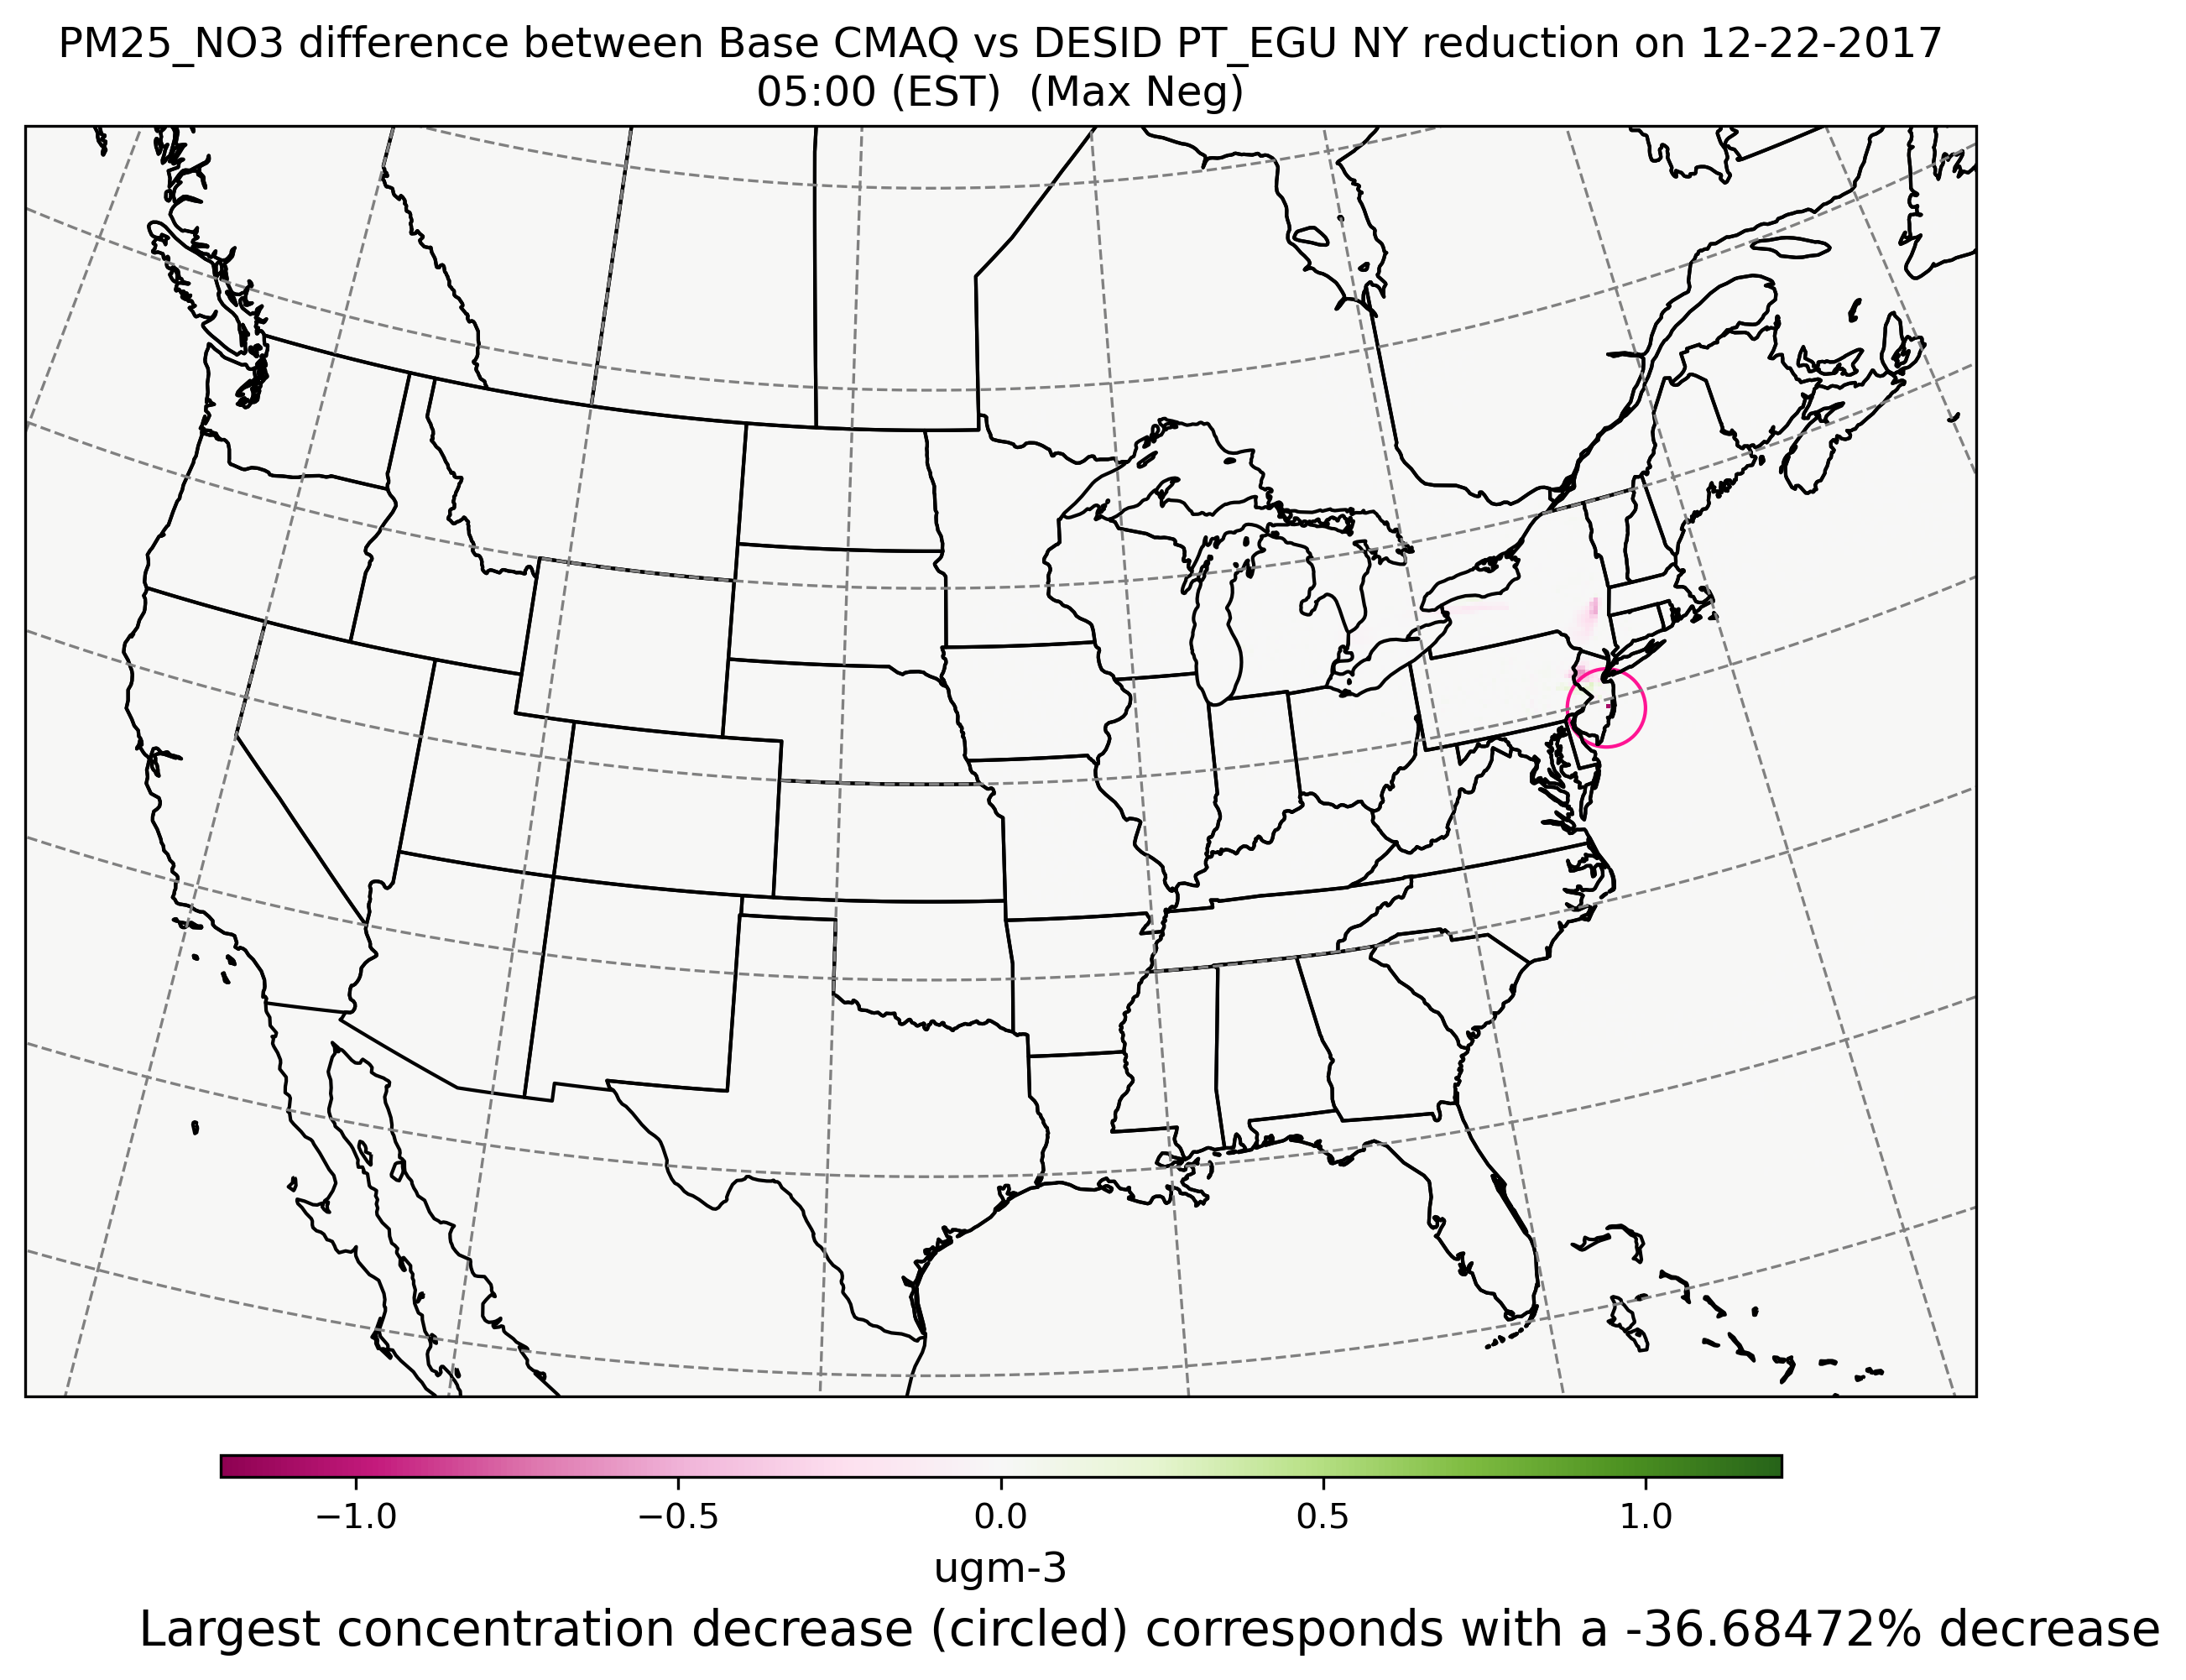

In [31]:
from IPython.display import Image
Image(filename='/fsx/data/output/desid_emis_red_images_new/PM25_NO3_difference_between_Base_CMAQ_vs_DESID_PT_EGU_NY_Emissions_reduction_on_12-22-2017_05.png')

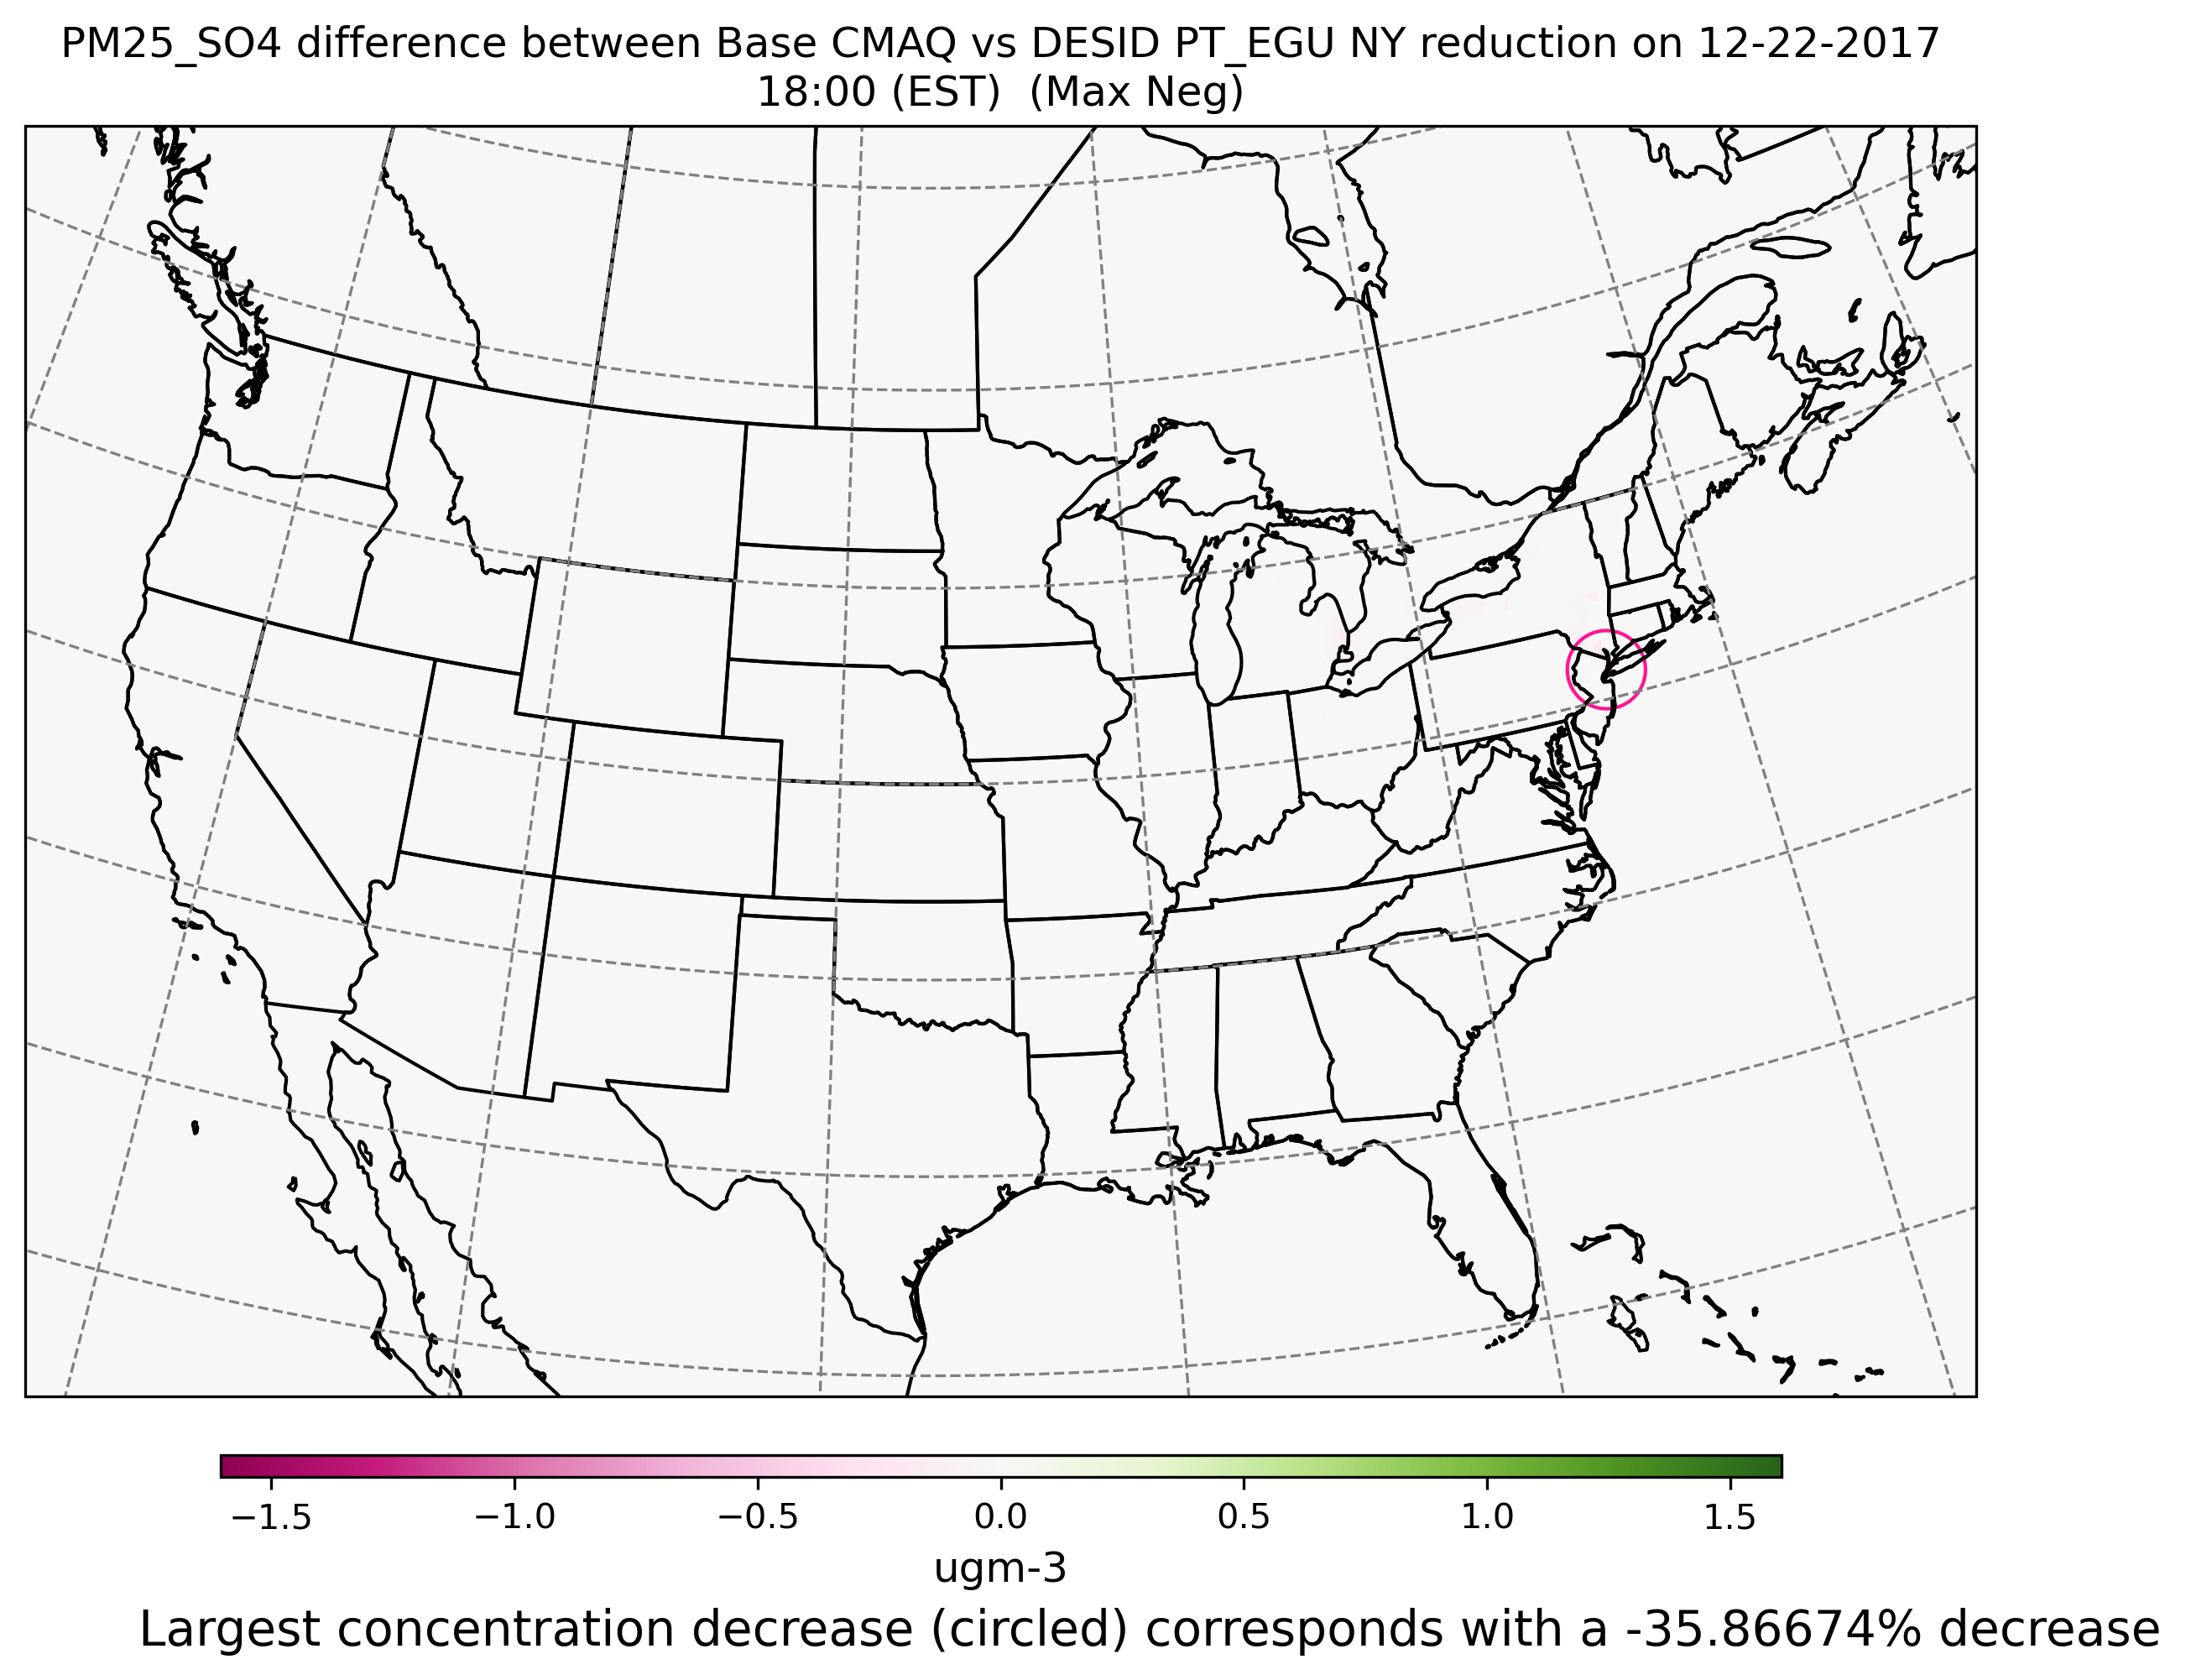

In [34]:
from IPython.display import Image
Image(filename='/fsx/data/output/desid_emis_red_images_new/PM25_SO4_difference_between_Base_CMAQ_vs_DESID_PT_EGU_NY_reduction_on_12-22-2017_18.png')